# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter...predicting a number.

In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.6.0


## Create data to view and fit

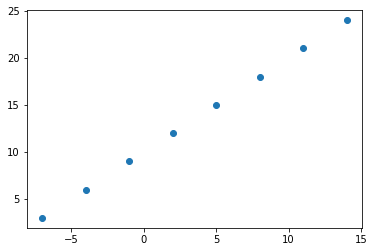

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
X[0].ndim

0

As it is 0 dimensional i.e scalar, hence it has no shape.

We want to predict one 'y' value based on one 'X' value.


In [8]:
# Turn numpy arrays into tensors

X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).


In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, #mae is mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #SGD - stochastic gradient descent
              metrics = ["mae"])

# 3.Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 496ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [11]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
# Try and make a prediction using trained model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

##Improving our model

We can improve our model by altering the steps we took to create ou rmodel:

1. **Creating a model** - Here we migth add more layers, increase the number of hidden units (also called neurons) withing each of the hidden layers, change the activate function of each layer.
2. **Compiling a model** - Here we might change the optimization function or perhaps th **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [13]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

# 2.Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics =["mae"])

# 3.Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 207ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 3m

In [14]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
# Predict using trained model
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [16]:
# Let's see if we can make another change to improve the model

# 1. create the model (with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation=None),
        tf.keras.layers.Dense(1)
])

# 2.Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics = ["mae"])

# 3.Fit the model
model.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 307ms/step - loss: 12.0109 - mae: 12.0109
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0827 - mae: 11.0827
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1377 - mae: 10.1377
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 9.1687 - mae: 9.1687
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 8.1666 - mae: 8.1666
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 7.1234 - mae: 7.1234
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.0477 - mae: 7.0477
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 7.4551 - mae: 7.4551
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.7955 - mae: 7.7955
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.8032 - mae: 7.8032
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - lo

In [17]:
# let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [18]:
# predict on trained model
model.predict([17.0])

array([[26.48575]], dtype=float32)

* So, eventhough loss and mae are lower this time, prediction is worse than the previous model. This implies that the model is overfitting, i.e it's learning the training data too well but not able to generalize on new unseen data.

* In above case, changing the optimizer to `Adam` with `lr=0.01` has given best results so far.

* Common ways to improve a deep model:
  * Adding layers
  * Increase the number of hidden units
  * Change the activation functions
  * Change the optimization function
  * Change the learning rate
  * Fitting on more data
  * Fitting for longer

* `learning_rate` is most important important hyperparameter for neural networks.

## Evaluating a model

In practice, a typical workflow you'll go throught when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation..there are 3 words to memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)? 

In [19]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
# Make labels for the dataset
y = X+10  # pattern that the model has to learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

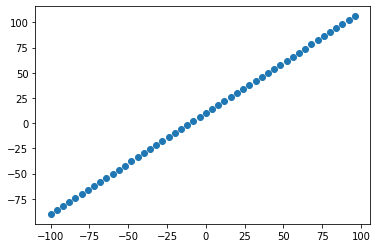

In [21]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [22]:
# Check the length of how many samples we have
len(X)

50

In [23]:
# Split the data into train and test set
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing smaples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets...let's visualize it again!

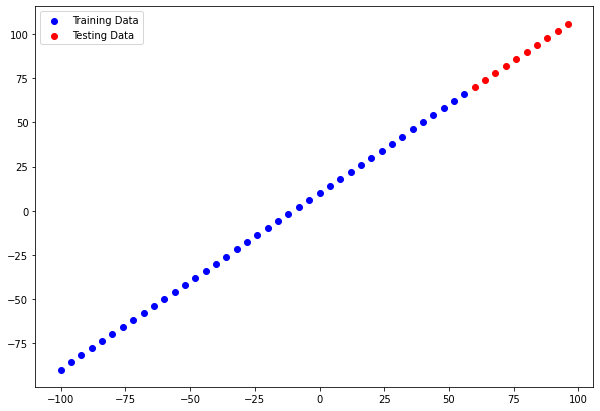

In [24]:
plt.figure(figsize=(10,7))

# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
# plot test data in green
plt.scatter(X_test, y_test, c="r", label="Testing Data")
# Show a legend
plt.legend();

In [25]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [26]:
# model.summary()

In [27]:
# Let's create a model which builds automatically by defining the input shape argument in the first layer
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])  # we are passing one number to predict one number                    
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* **Total params** - total number of parameters in the model.
* **Trainable params** = these are the parameters (patterns) the model can update as it trains.
* **Non trainable params** - these parameters aren't updated during training (this is typical when you bring in already learnt patterns or parameters from other models during **transfer learning**.

In [29]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - 